In [5]:
import numpy as np
import glob
from matplotlib import pyplot as plt
import torch
import os
import os.path as osp
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
"""---- Code by Hieu Hoang ---- """

'---- Code by Hieu Hoang ---- '

In [15]:
data_dir = "/home/hthieu/data/tiny-imagenet-200/val/images/"
with open("triplet_pairs/val_lst.txt") as fi:
    imgs_lst = [i.strip() for i in fi.readlines()]

with open("triplet_pairs/val_cls.txt") as fi:
    imgs_cls = [i.strip() for i in fi.readlines()]
    
imgs_path = [osp.join(data_dir,i) for i in imgs_lst]


def show_query(img_query, imgs_res,n_rows = 2, n_cols = 10):
    fig = plt.figure(figsize=(4. * n_cols, 4. * n_rows))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     )
    def show_img(ax, img_idx, title = None, color =  "green"):
        im = np.array(Image.open(imgs_path[img_idx]))
        ax.imshow(im)
        ax.axis("off")
        ax.set_title(title, fontsize=23, c = color)

    for i, ax in enumerate(grid):
        q_cls = imgs_cls[img_query]
        if (i==0):
            show_img(ax,img_query, "QUERY - cls:" + q_cls)
        else:
            g_cls = imgs_cls[imgs_res[i]]
            color = "green" if q_cls == g_cls else "red"
            show_img(ax,imgs_res[i], "{} - cls: {}".format(i, g_cls), color)
def show_multiple_queries(exp_id, queries_lst):
    preds = np.load(osp.join("logs", exp_id, "eval_results/val_preds.npy"))
    for que_id in queries_lst:
        show_query(que_id, preds[que_id,:])

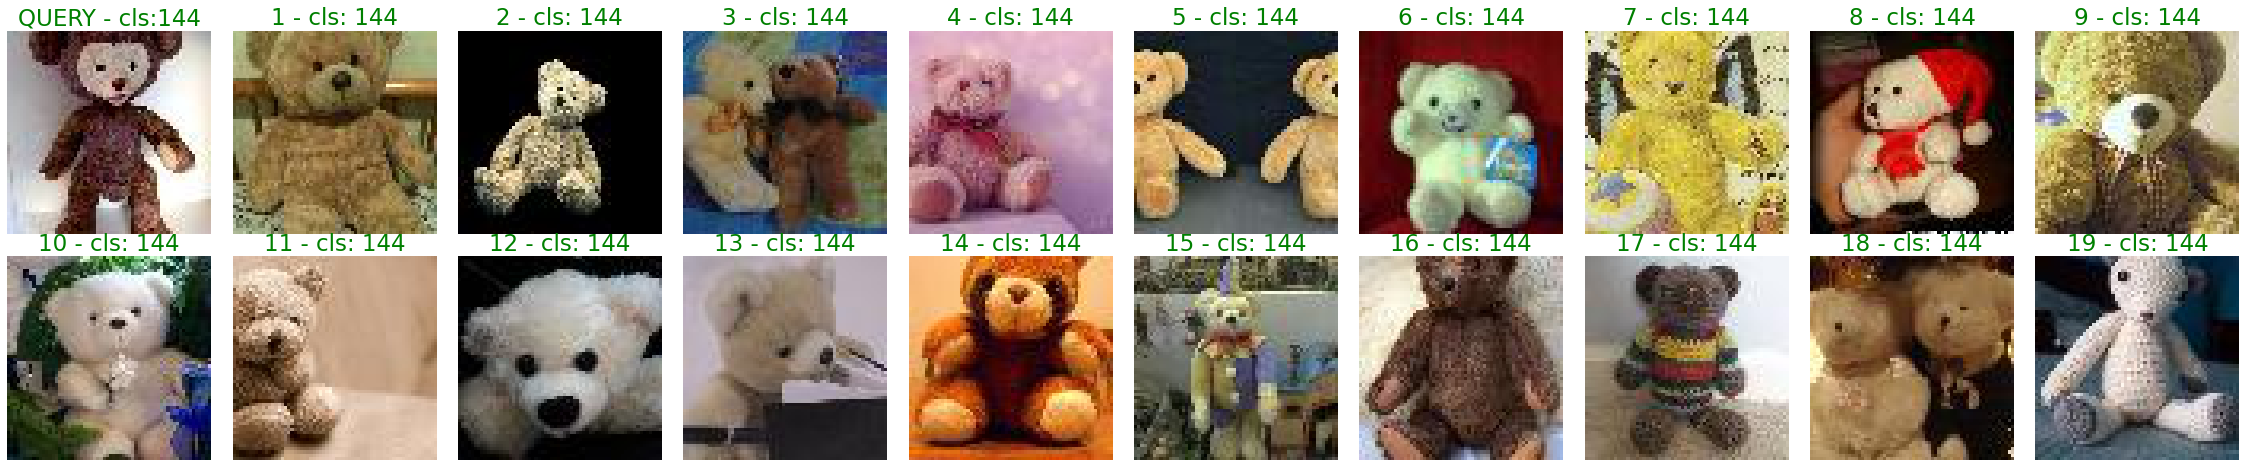

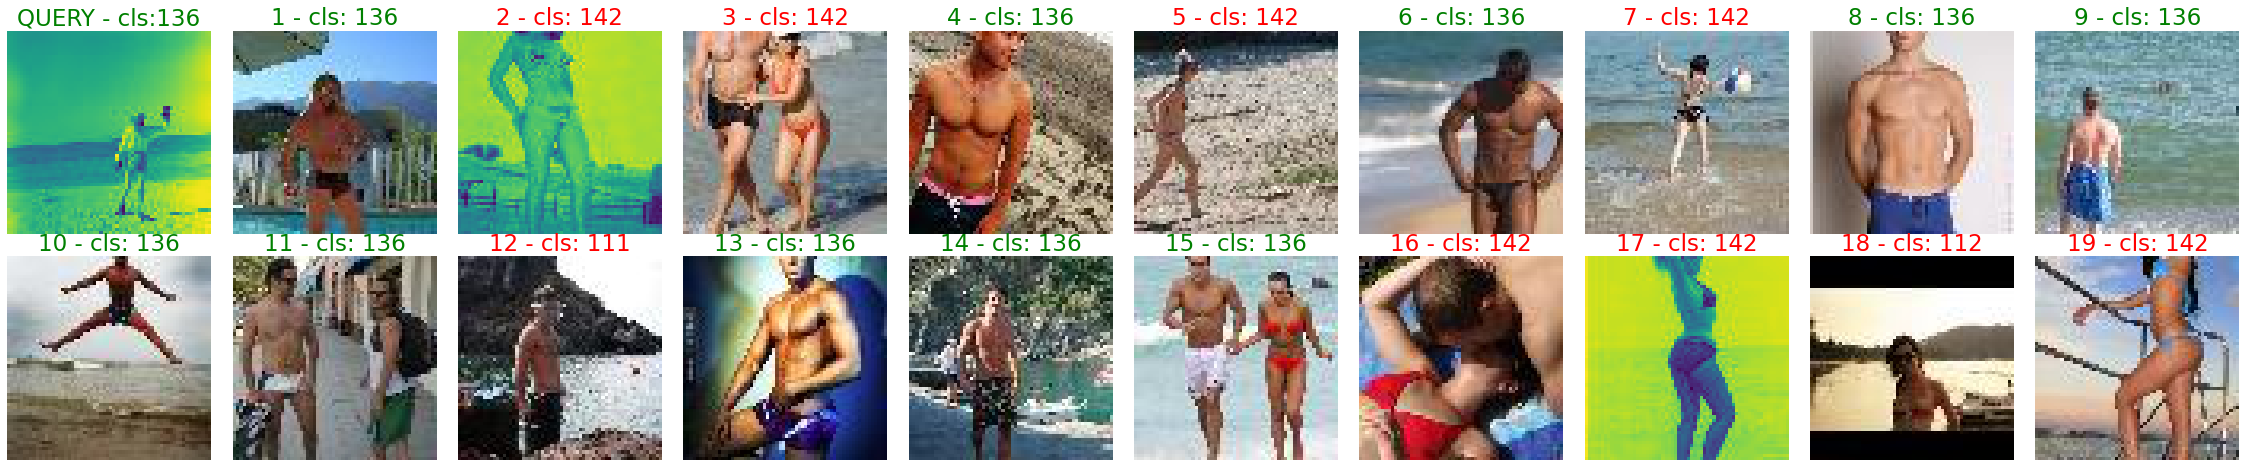

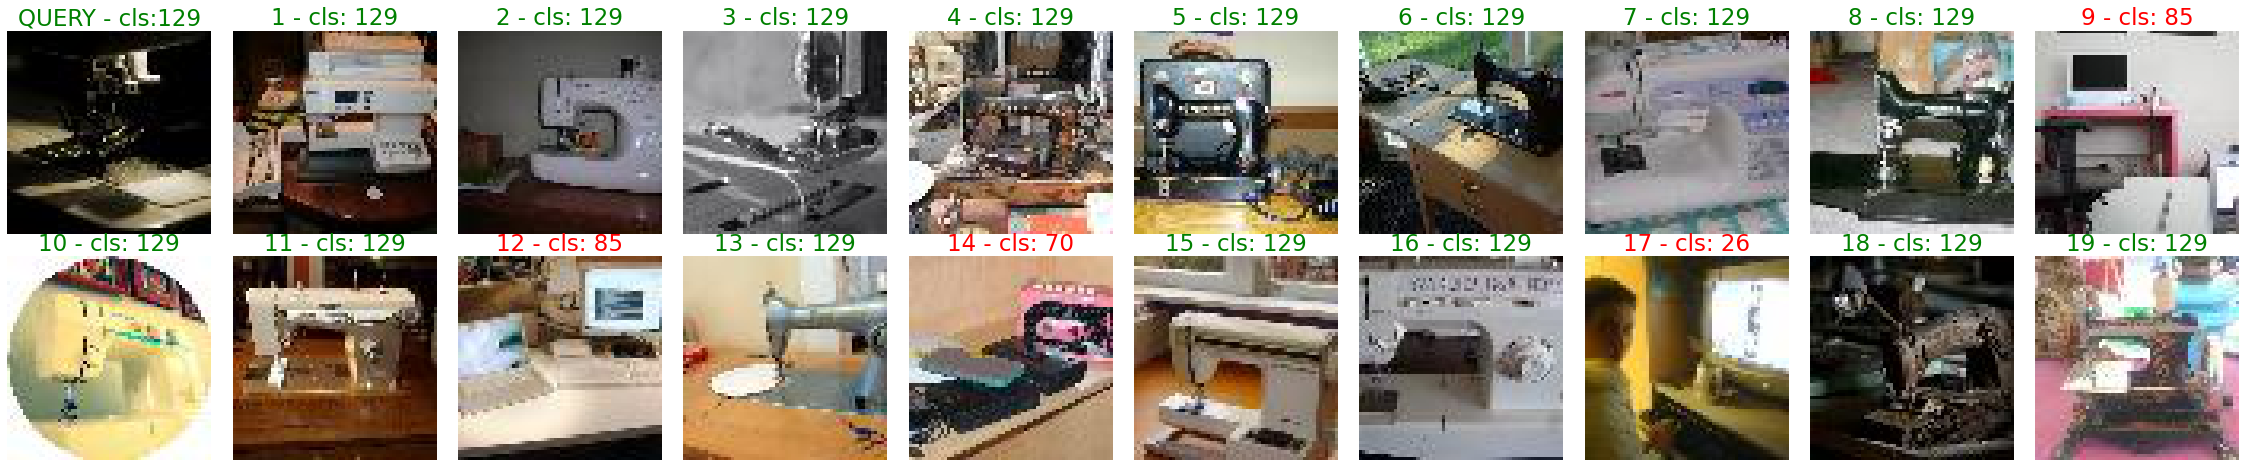

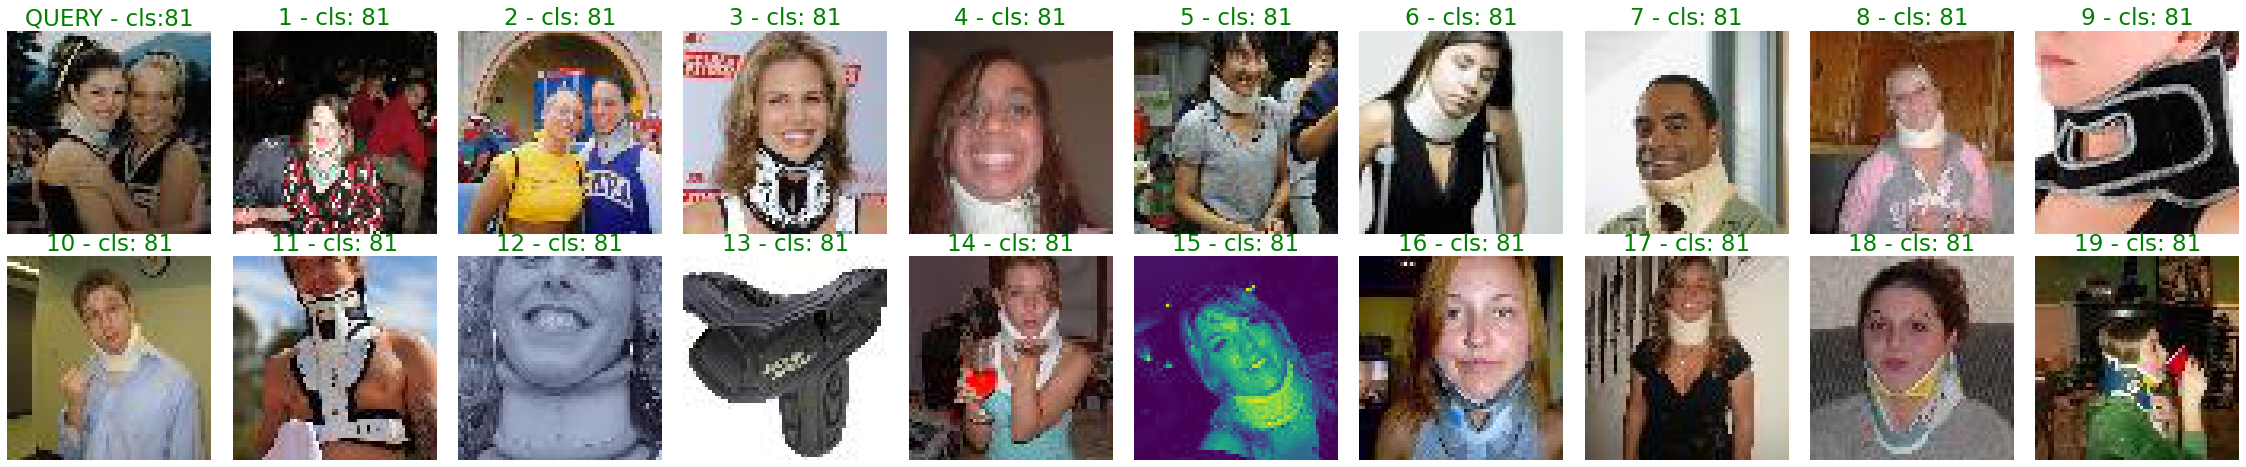

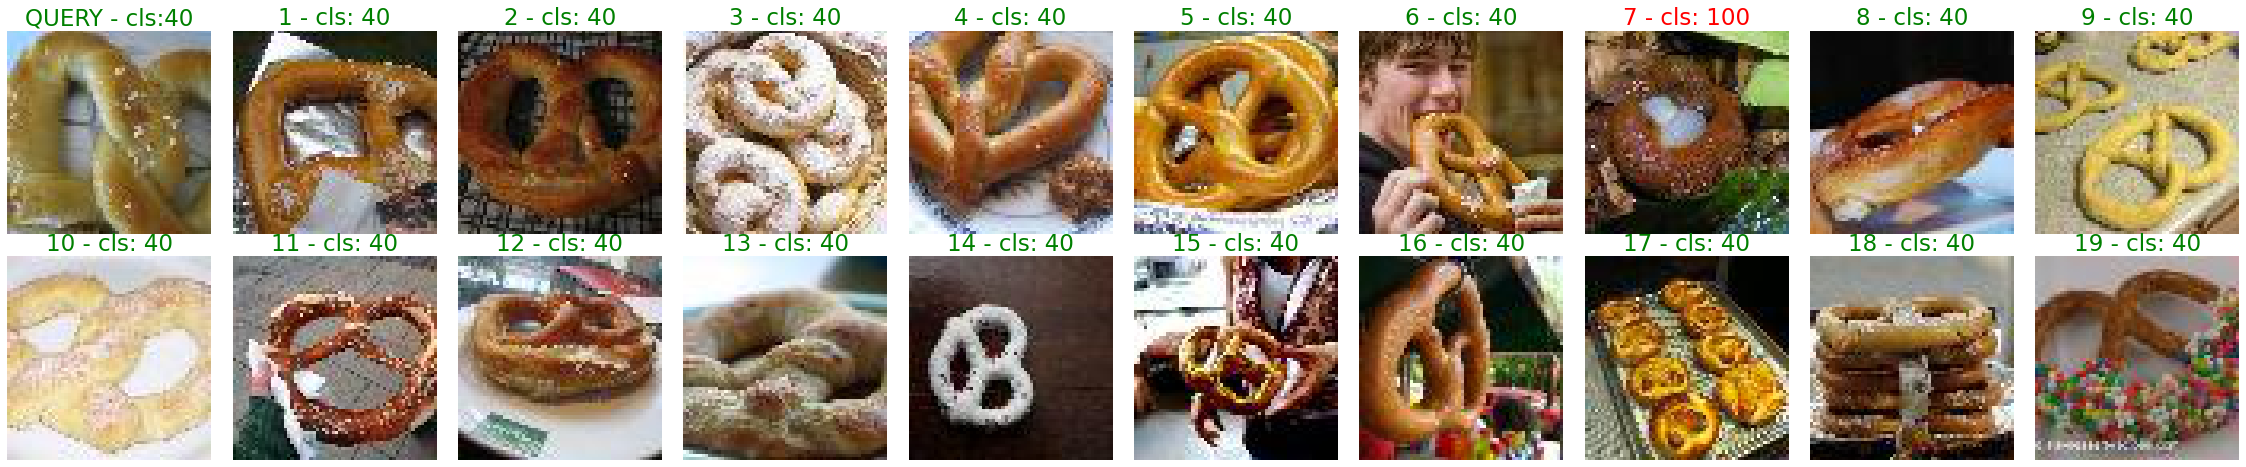

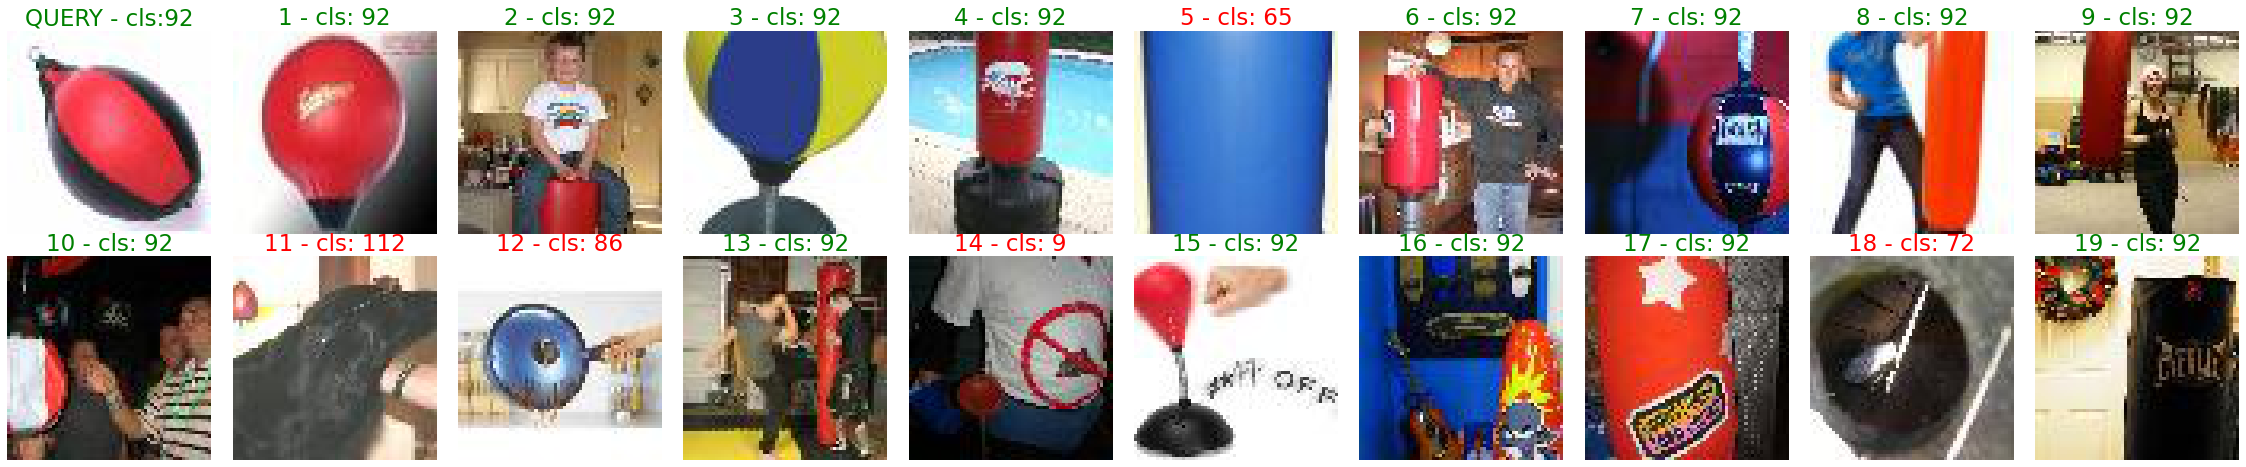

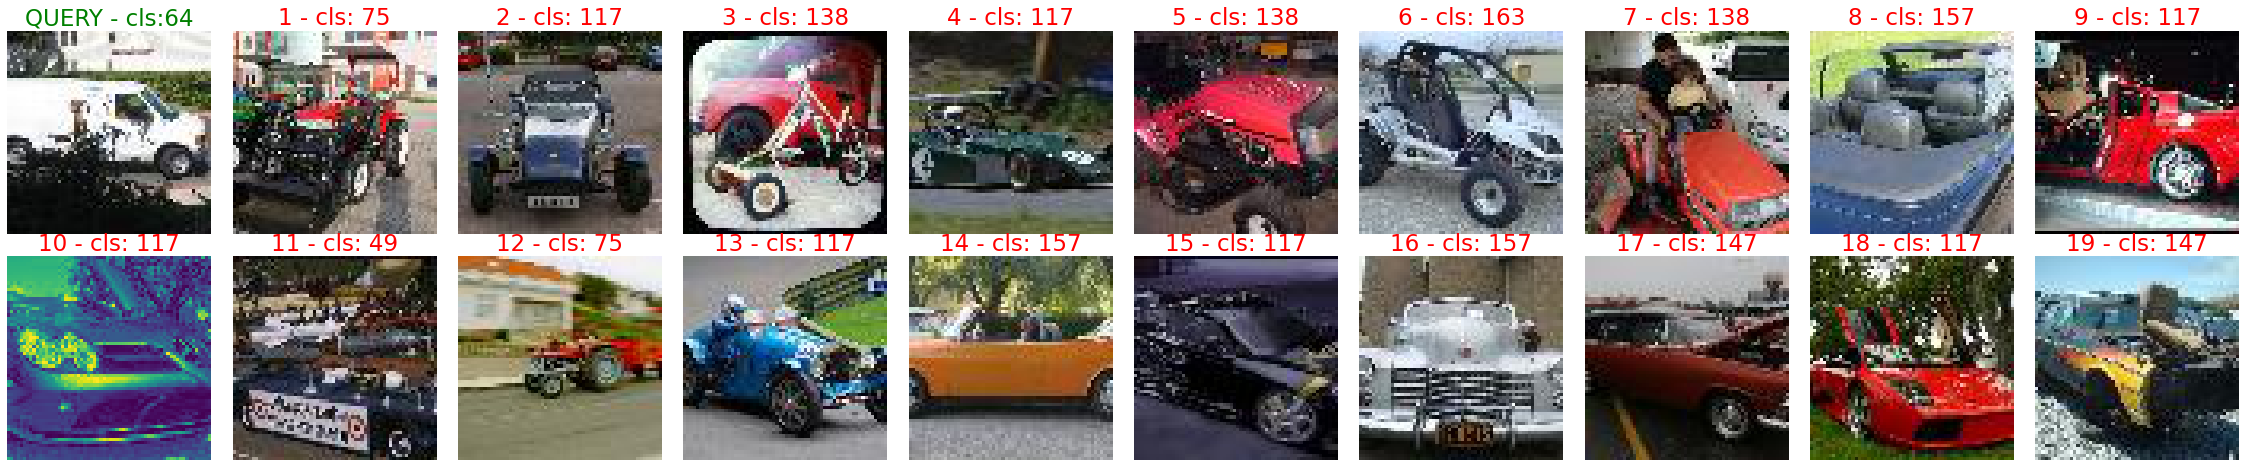

In [17]:
show_multiple_queries("img_ranking_baseline_res50_cfg4", [5,10,6,20, 166, 1000, 30])